In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize

from sklearn.linear_model import Ridge, ElasticNet
from sklearn.metrics import r2_score, root_mean_squared_error

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, GridSearchCV 

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import pickle

RANDOM_STATE = 42

In [2]:
df = pd.read_csv("C:/Users/HP/Downloads/Song_Popularity/song_data.csv")

### **Viewing the data**

In [3]:
df.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [4]:
df.shape

(18835, 15)

In [5]:
df.isna().sum()

song_name           0
song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


In [7]:
df.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


In [8]:
df.nunique().sort_values()

audio_mode              2
time_signature          5
key                    12
song_popularity       101
danceability          849
energy               1132
speechiness          1224
audio_valence        1246
liveness             1425
acousticness         3209
instrumentalness     3925
loudness             8416
song_duration_ms    11771
tempo               12112
song_name           13070
dtype: int64

In [9]:
df["key"].value_counts()

key
0     2182
1     2164
7     2032
2     1715
9     1698
11    1600
5     1574
6     1351
8     1349
10    1331
4     1327
3      512
Name: count, dtype: int64

In [10]:
df["audio_mode"].value_counts()

audio_mode
1    11831
0     7004
Name: count, dtype: int64

In [11]:
df["time_signature"].value_counts()

time_signature
4    17754
3      772
5      233
1       73
0        3
Name: count, dtype: int64

**Inference:** The dataset has 3 categorical and 12 numerical columns

### **Removing Duplicates**

In [12]:
df.duplicated(subset = ["song_name","song_duration_ms","song_popularity","audio_mode"]).value_counts()

False    14922
True      3913
Name: count, dtype: int64

In [13]:
df.drop_duplicates(subset = ["song_name","song_duration_ms","song_popularity","audio_mode"], inplace = True)

In [14]:
df.drop('song_name', inplace = True, axis = 1)

In [15]:
df.shape

(14922, 14)

### **Handling Outliers** 

In [16]:
#df1 = df.drop("song_name", axis=1)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1

In [17]:
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum().sort_values(ascending=False)

instrumentalness    3212
speechiness         1821
time_signature       949
liveness             934
song_duration_ms     643
loudness             564
danceability         111
tempo                 68
energy                45
song_popularity        0
acousticness           0
key                    0
audio_mode             0
audio_valence          0
dtype: int64

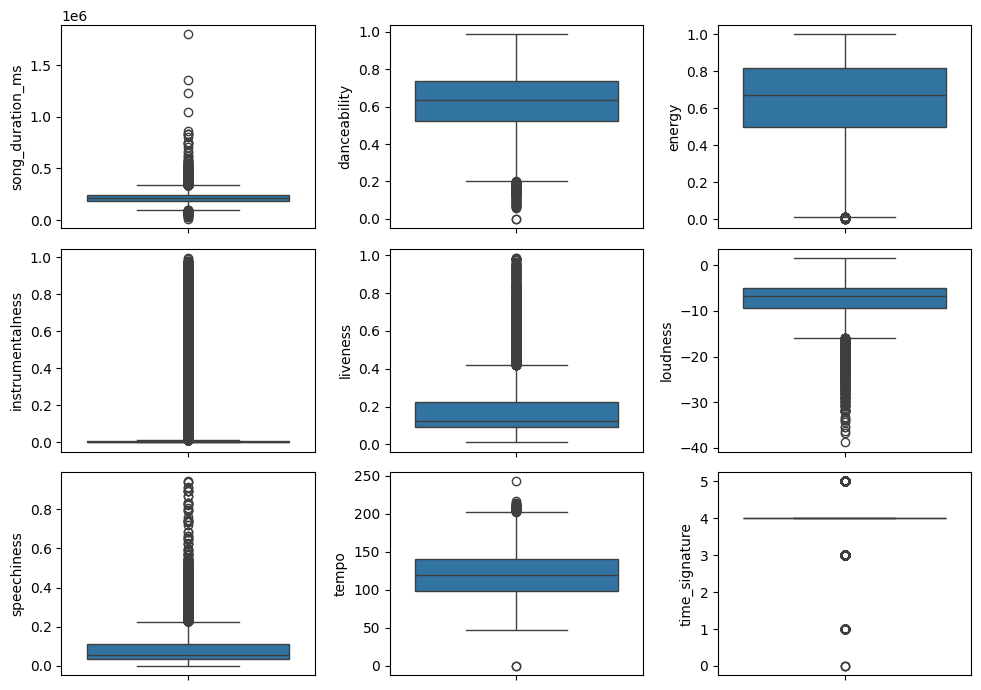

In [18]:
# Plotting the outliers
columns_with_outliers = ['song_duration_ms','danceability', 'energy', 'instrumentalness', 'liveness',
           'loudness', 'speechiness', 'tempo', 'time_signature']

plt.figure(figsize = (10,7))
for i,column in enumerate(columns_with_outliers):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data = df, y= column)

plt.tight_layout()
plt.show()

### **Creating train and test sets**

In [19]:
X = df.drop(columns = ["song_popularity"])
y = df["song_popularity"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = RANDOM_STATE)

### **Creating a pipeline**

In [20]:
X_train.head()

,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
6797,158674,0.009810,0.586,0.726,0.000024,0,0.1310,-7.058,1,0.0279,89.959,4,0.346
520,245266,0.000895,0.577,0.676,0.000002,8,0.0625,-11.931,1,0.0295,95.980,4,0.676
740,288533,0.000732,0.536,0.869,0.000374,4,0.3370,-4.910,0,0.0597,166.383,4,0.493
7077,211710,0.000628,0.870,0.386,0.225000,7,0.0322,-8.081,1,0.4640,157.845,3,0.734
13082,332149,0.640000,0.563,0.404,0.000930,9,0.2070,-16.066,1,0.0548,155.864,4,0.689


In [21]:
# columns_with_outliers = ['song_duration_ms','danceability', 'energy', 'instrumentalness', 'liveness',
#            'loudness', 'speechiness', 'tempo', 'time_signature']
# [0,2,3,4,6,7,9,10,11]

In [22]:
# Custom winsorizer transformer to remove outliers
class Winsonizer(BaseEstimator, TransformerMixin):
    def __init__(self, limits=(0.05, 0.05)):
        self.limits = limits
        
    def fit(self, X, y=None):
        return self
        
    def transform(self, X):
        X_winsorized = X.copy()
        
        for col in range(X_winsorized.shape[1]):
            X_winsorized.iloc[:,col] = winsorize(X_winsorized.iloc[:,col], limits = self.limits)
        return X_winsorized

In [23]:
trf1 = ColumnTransformer([
    ("winsonizer", Winsonizer(limits = (0.05,0.05)), [0,2,3,4,6,7,9,10,11])
], remainder = "passthrough")

In [24]:
# One Hot Encode categorical data 
trf2 = ColumnTransformer([
    ("one_hot_encode",OneHotEncoder(sparse_output = False, handle_unknown = 'ignore'),[5,8,11]),  
], remainder = "passthrough")

In [25]:
# scale features
trf3 = ColumnTransformer([
    ("scale", MinMaxScaler(), slice(0,29))
], remainder = "passthrough")

In [26]:
# Ridge Regression
trf4 = Ridge(random_state = RANDOM_STATE)

In [27]:
pipeline = Pipeline([
    ("trf1",trf1),
    ("trf2",trf2),
    ("trf3",trf3),
    ("trf4",trf4),
])

In [28]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('winsonizer', Winsonizer(),
                                                  [0, 2, 3, 4, 6, 7, 9, 10,
                                                   11])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encode',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [5, 8, 11])])),
                ('trf3',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 29, None))])),
                ('trf4', Ridge(random_state=42))])

In [30]:
y_pred = pipeline.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"r2 score: {r2}")

root_mean_square_error = root_mean_squared_error(y_test, y_pred)
print(f"Root mean square error: {root_mean_square_error}")

r2 score: -0.09859985995347542
Root mean square error: 21.202766677954248
